In [440]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
from matplotlib import rc

data_all = np.genfromtxt('ac.csv', delimiter=',')

In [441]:
def get_variance(data,model):
    return sum((data-model)**2)/np.shape(data)

([<matplotlib.axis.XTick at 0x1e638d88e48>,
 <a list of 7 Text xticklabel objects>)

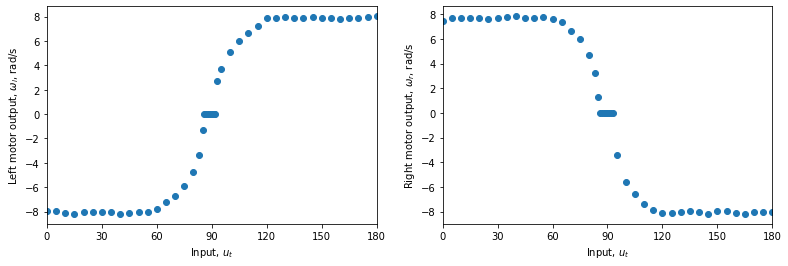

In [442]:
# Plot overall response curves obtained from data
plt.figure(figsize=[13,4])

# Left wheel
plt.subplot(121).set_xlim([0,180])
plt.scatter(data_all[:,0],data_all[:,1]) 
plt.xlabel("Input, $u_t$")
plt.ylabel("Left motor output, $\omega_l$, rad/s")
plt.xticks(np.linspace(0,180,7))

# Right wheel
plt.subplot(122).set_xlim([0,180])
plt.scatter(data_all[:,0],data_all[:,2]) 
plt.xlabel("Input, $u_t$")
plt.ylabel("Right motor output, $\omega_r$, rad/s")
plt.xticks(np.linspace(0,180,7))

In [509]:
## Extract data from saturation regions

# left motor,above 90
ind_left_as = range(34,45)

# left motor, below 90
ind_left_bs = range(0,10)

# right motor, above 90
ind_right_as = range(34,45)

# right motor, below 90
ind_right_bs = range(0,8)

saturatation_ranges = [[data_all[ind_left_as,0][0],data_all[ind_left_as,0][-1]],
                         [data_all[ind_left_bs,0][0],data_all[ind_left_bs,0][-1]],
                         [data_all[ind_right_as,0][0],data_all[ind_right_as,0][-1]],
                         [data_all[ind_right_bs,0][0],data_all[ind_right_bs,0][-1]]]


In [578]:
## For the saturation region, we model the output as a constant function
# Get means

saturation = []
saturation.append(np.mean(data_all[ind_left_as,1]))
saturation.append(np.mean(data_all[ind_left_bs,1]))
saturation.append(np.mean(data_all[ind_right_as,2]))
saturation.append(np.mean(data_all[ind_right_bs,2]))

print(saturation)

sat_var = [0,0,0,0]
sat_var[0] = get_variance(data_all[ind_left_as,1],saturation[0])
sat_var[1] = get_variance(data_all[ind_left_bs,1],saturation[1])
sat_var[2] = get_variance(data_all[ind_right_as,2],saturation[2])
sat_var[3] = get_variance(data_all[ind_right_bs,2],saturation[3])
print(sat_var)

[7.916944760363637, -8.060222264100002, -8.041020904636364, 7.667389519625]
[array([0.0034905]), array([0.00584804]), array([0.00525421]), array([0.01099584])]


In [510]:
## Extract data from curved region

# left motor,above 90
ind_left_a = range(25,33) 

# left motor, below 90
ind_left_b = range(11,20) 

# right motor, above 90
ind_right_a = range(26,33) 

# right motor, below 90
ind_right_b = range(9,20)

curve_input_range = [[data_all[ind_left_a,0][0],data_all[ind_left_a,0][-1]],
                     [data_all[ind_left_b,0][0],data_all[ind_left_b,0][-1]],
                     [data_all[ind_right_a,0][0],data_all[ind_right_a,0][-1]],
                     [data_all[ind_right_b,0][0],data_all[ind_right_b,0][-1]]]


print(curve_input_range)

[[92.0, 120.0], [55.0, 86.0], [93.0, 120.0], [45.0, 86.0]]


In [581]:
# Spline model input ranges
model_inputs = []
for i in range(0,4):
    model_inputs.append(np.linspace(curve_input_range[i][0],curve_input_range[i][1],curve_input_range[i][1]-curve_input_range[i][0]+1))

model_inputs[1] = model_inputs[1]
model_inputs[3] = model_inputs[3]

def get_poly_curve(data,inputs):
    
    weights = np.ones(np.shape(data))
    weights[0] = 10
    weights[-1] = 10
    
    f2 = interp.interp1d(inputs, data, kind='linear')
    
    poly = np.polyfit(inputs,data,2)
    
    #plt.scatter(inputs, data)
    
    sweep = np.linspace(inputs[0],inputs[-1],inputs[-1]-inputs[0])
    
    newy = np.array(f2(sweep))
    plt.plot(sweep,newy)
    #plt.plot(sweep,np.polyval(poly,sweep))
        
    return newy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


[[ 93.           2.7318197    0.        ]
 [ 95.           3.66794239  -3.37805662]
 [100.           5.07732146  -5.55788174]
 [105.           6.00686932  -6.60692461]
 [110.           6.64535728  -7.34445974]
 [115.           7.2096217   -7.8295144 ]
 [120.           7.84907596  -8.13884107]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


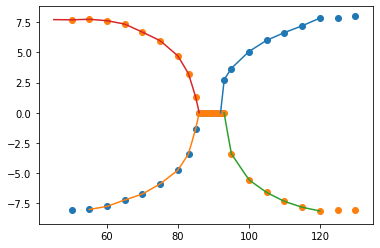

In [582]:
print(data_all[ind_right_a])
poly_curves = []

plt.scatter(data_all[10:35,0],data_all[10:35,1])
plt.scatter(data_all[10:35,0],data_all[10:35,2])

for indices,col in zip([ind_left_a, ind_left_b, ind_right_a, ind_right_b],[1,1,2,2]):
    model_x = data_all[indices,0]
    model_y = data_all[indices,col]
    poly_curves.append(get_poly_curve(model_y,model_x))


In [583]:
# Create and plot model

response = np.zeros([180,2])

for i in range(0,4):
    p = [0,0,1,1]
    s = [0,1,0,1]
    col = p[i]
    
    
    a_c = int(curve_input_range[i][0]) + s[i]
    b_c = int(curve_input_range[i][-1]) + s[i]
    
    
    
    ap = poly_curves[i]
    response[a_c:b_c,col] = ap
    

response[int(curve_input_range[0][-1]):,0] = saturation[0]
response[0:int(curve_input_range[1][0])+1,0] = saturation[1]

response[int(curve_input_range[2][-1]):,1] = saturation[2]
response[0:int(curve_input_range[3][0])+1,1] = saturation[3]

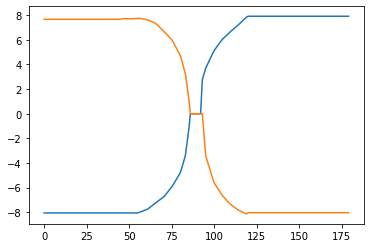

In [584]:
plt.plot(response[:,0])
plt.plot(response[:,1])

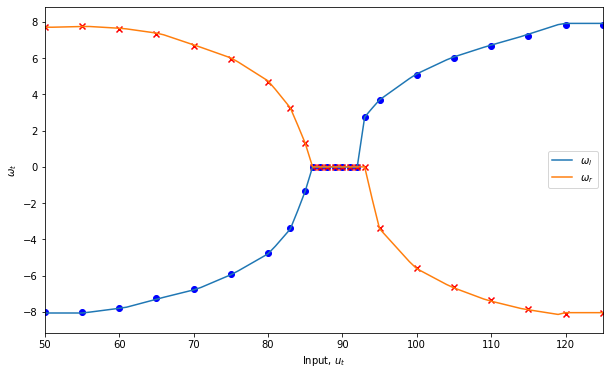

In [585]:
plt.figure(figsize=[10,6])
plt.scatter(data_all[:,0],data_all[:,1], c='b', marker = 'o')
plt.scatter(data_all[:,0],data_all[:,2], c='r', marker = 'x')

# poly_curves[region][0: coeff; 1: inputs]

plt.xlim([50,125])
plt.xlabel("Input, $u_t$")
plt.ylabel("$\omega_t$")

# left, above 90
plt.plot(response[:,0])

# right, above 90
plt.plot(response[:,1])

plt.legend(["$\omega_l$","$\omega_r$"])


In [587]:
np.savetxt('actuation_curve_interp.csv', response, delimiter=',')

array([0.0034905])

In [182]:
print(poly_curves)

[[array([2.7038482 , 2.30532366]), [1, 2, 3, 4, 5, 6, 7]], [array([-3.32978409, -1.2199409 ]), [1, 2, 3, 4, 5, 6, 7, 8]], [array([-2.67346608, -3.54437887]), [1, 2, 3, 4, 5, 6]], [array([3.40300979, 1.12301464]), [1, 2, 3, 4, 5, 6, 7]]]


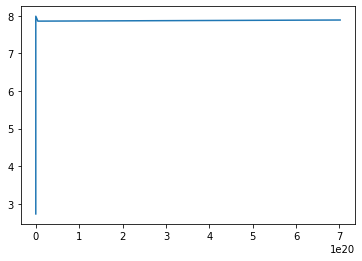